# get data

In [1]:
## data cleaning
a<-read.csv("../data/LogisticGrowthData.csv", header = T, stringsAsFactors = F)[,-1]
  a<-a[,c(3,6:9,1,2,5)]
  colnames(a)=c("Temp.C","clade","substrate","replicate","SourceRef","Time.hr","Popn_Change","Popn_DataUnit")
  a$Time.hr<-abs(a$Time.hr) ## convert -ve times
  a$clade<-gsub(".1|.2|..RDA.R.","",a$clade) ## condense spp names
  a$clade<-gsub("spp.|sp.","sp",a$clade) ## condense spp names
  a$clade<-gsub("[.]"," ",a$clade) ## condense spp names
  a$clade<-gsub("77|88|Strain 97|StrainCYA28|subsp Carotovorum Pc","",a$clade) ## rm specific unnecessary things for better spp categorizing
  a$clade<-trimws(a$clade) ## condense spp names (rm white spaces from both ends)
  # levels(as.factor(a$clade))
a

Temp.C,clade,substrate,replicate,SourceRef,Time.hr,Popn_Change,Popn_DataUnit
<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
5,Chryseobacterium balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",6.698795e+02,0.283275712,OD_595
5,Chryseobacterium balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",6.469880e+02,0.283342064,OD_595
5,Chryseobacterium balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",6.228916e+02,0.285151039,OD_595
5,Chryseobacterium balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",5.975904e+02,0.281746115,OD_595
5,Chryseobacterium balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",5.746988e+02,0.273116815,OD_595
5,Chryseobacterium balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",5.506024e+02,0.257534486,OD_595
5,Chryseobacterium balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",5.265060e+02,0.257604330,OD_595
5,Chryseobacterium balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",5.024096e+02,0.245500262,OD_595
5,Chryseobacterium balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",4.795181e+02,0.247305745,OD_595


In [2]:
write.table(a, "../data/Log_Data.txt",sep="\t", quote=F)

# extract unique datasets

In [3]:
a.0<-as.data.frame(matrix(nrow=0, ncol=(dim(a)[2]-2)))
for(i in 1:dim(a)[1]){
    if(i==1){
        v.1<-unique(a.0[,1])
        v.2<-unique(a.0[,2])
        v.3<-unique(a.0[,3])
        v.4<-unique(a.0[,4])
        v.5<-unique(a.0[,5])
        v.6<-unique(a.0[,6])
        }
    if(!(a[i,1] %in% v.1 & a[i,2] %in% v.2 & a[i,3] %in% v.3 & a[i,4] %in% v.4 & a[i,5] %in% v.5 & a[i,8] %in% v.6)){
        a.0<-rbind(a.0,a[i,-c(6:7)])
        v.1<-unique(a.0[,1])
        v.2<-unique(a.0[,2])
        v.3<-unique(a.0[,3])
        v.4<-unique(a.0[,4])
        v.5<-unique(a.0[,5])
        v.6<-unique(a.0[,6])
    }
};rm(i)
a.0

,Temp.C,clade,substrate,replicate,SourceRef,Popn_DataUnit
,<int>,<chr>,<chr>,<int>,<chr>,<chr>
1,5,Chryseobacterium balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",OD_595
30,5,Enterobacter sp,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",OD_595
59,5,Pantoea agglomerans,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",OD_595
119,5,Bacillus pumilus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",OD_595
148,5,Clavibacter michiganensis,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",OD_595
177,5,Pseudomonas fluorescens,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",OD_595
235,5,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",OD_595
293,5,Stenotrophomonas maltophilia,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",OD_595
351,5,Klebsiella pneumonia,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",OD_595


In [4]:
write.table(a.0, "../data/Log_Uq.txt",sep="\t", quote=F)

# functions

## Verhulst / classical logistic
\begin{equation}
N_t = \dfrac{N_0Ke^{rt}}{K+N_0(e^{rt}-1)}
\end{equation}

In [5]:
func_log0<-function(N0,K,r,t){
  ## traditional Logistic equation: y~x
  Nt=N0*K*exp(r*t)/(K+N0*(exp(r*t)-1))
  return(Nt)}

## modified Gompertz
\begin{equation}
A = \text{ln}(\dfrac{N_{max}}{N_{min}})
\end{equation}

\begin{equation}
N_t = A \cdot\text{exp}\Big\{-\text{exp}\Big[\dfrac{r_{max}e}{A}(\lambda-t)+1\Big]\Big\}
\end{equation}
1. assume $r_{max}$ = $r$
2. assume $N_{min}$ = $N_0$
3. assume $N_{max}$ = $K$

In [6]:
func_gom<-function(N0,K,r,t,ld){
  ## modified Gompertz model, initial 
  A=log(K/N0)
  Nt=A*exp(-exp(r*exp(1)/A*(ld-t)+1))
  return(Nt)}

## Baranyi
\begin{equation}
h_0 = (\text{exp}\{\lambda\times r_{max}\}-1)^{-1}
\end{equation}

\begin{equation}
A_t = t+\dfrac{1}{r_{max}}\cdot\text{ln}\Big(\dfrac{e^{-r_{max}t}+h_0}{1+h_0}\Big)
\end{equation}

\begin{equation}
N_t = N_{min}+r_{max}A_t - \text{ln}\Big(1+\dfrac{e^{r_{max}A_t}-1}{e^{N_{max}-N_{min}}}\Big)
\end{equation}
1. assume $r_{max}$ = $r$
2. assume $N_{min}$ = $N_0$
3. assume $N_{max}$ = $K$

In [7]:
func_bar<-function(N0,K,r,t,tlag){
  ## Baranyi model
  h0=1/(exp(tlag*r)-1)
  At=t+1/r*log((exp(-r*t)+h0)/(1+h0))
  Nt=N0+r*At-log(1+(exp(r*At)-1)/exp(K-N0))
  return(Nt)}

## Buchanan
\begin{equation}
t \leq t_{lag}: N_t = N_{min}
\end{equation}

\begin{equation}
t_{lag} \lt t \lt t_{max}: N_t = N_{max} + r_{max}\cdot(t-t_{lag})
\end{equation}

\begin{equation}
t \geq t_{max}: N_t = N_{max}
\end{equation}

if "lag", "log" and "stationary" periods = cluster $[cst]$ 1, 2, 3 respectively,  
further adaptations:
1. equation fusion from three into one
2. assume $r_{max}$ = $r$
3. assume $N_{min}$ = $N_0$
4. assume $N_{max}$ = $K$

make only log phase valid for log-phase term:
\begin{equation*}
a.010 = ([cst]-1)mod\;2
\end{equation*}

make only stationary phase valid to base number on K:
\begin{equation*}
a.001 = \text{round-up}([cst]mod\;2.5\;mod\;1)
\end{equation*}
%% LatTex spacing in Math mode <http://www.emerson.emory.edu/services/latex/latex_119.html>

Final conditional equation:
\begin{equation*}
N_t = N_{min}+a.001\times(N_{max}-N_{min})+a.010\times\text{exp}(r\times(t-t_{lag}))
\end{equation*}

In [8]:
func_buc<-function(N0,K,r,t,tlag,cst){
  ## Buchanan model / three-phase logistic model
  a.010=(cst-1)%%2 ## make only log phase valid in growth rate
  a.001=ceiling(cst%%2.5%%1) ## make only final phase valid
  Nt=N0+a.001*(K-N0)+a.010*r*(t-tlag)
  return(Nt)}

# for loop the below codes

## prelim plot

In [13]:
sel<-56
a.1<-a[which(a[,1]==a.0[sel,1] &
            a[,2]==a.0[sel,2] &
            a[,3]==a.0[sel,3] &
            a[,4]==a.0[sel,4] &
            a[,5]==a.0[sel,5] &
            a[,8]==a.0[sel,6]),]
a.1$Popn_Change<-ifelse(a.1$Popn_Change<1,1,a.1$Popn_Change)
a.1

,Temp.C,clade,substrate,replicate,SourceRef,Time.hr,Popn_Change,Popn_DataUnit
,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
3952,10,Lactobaciulus plantarum,MRS,1,"Zwietering, M.H., De Wit, J.C., Cuppers, H.G.A.M. and Van't Riet, K., 1994. Modeling of bacterial growth with shifts in temperature. Appl. Environ. Microbiol., 60(1), pp.204-213.",345.0703,2934.025,N
3953,10,Lactobaciulus plantarum,MRS,1,"Zwietering, M.H., De Wit, J.C., Cuppers, H.G.A.M. and Van't Riet, K., 1994. Modeling of bacterial growth with shifts in temperature. Appl. Environ. Microbiol., 60(1), pp.204-213.",320.9008,2517.072,N
3954,10,Lactobaciulus plantarum,MRS,1,"Zwietering, M.H., De Wit, J.C., Cuppers, H.G.A.M. and Van't Riet, K., 1994. Modeling of bacterial growth with shifts in temperature. Appl. Environ. Microbiol., 60(1), pp.204-213.",314.2903,3434.280,N
3955,10,Lactobaciulus plantarum,MRS,1,"Zwietering, M.H., De Wit, J.C., Cuppers, H.G.A.M. and Van't Riet, K., 1994. Modeling of bacterial growth with shifts in temperature. Appl. Environ. Microbiol., 60(1), pp.204-213.",310.7409,2329.708,N
3956,10,Lactobaciulus plantarum,MRS,1,"Zwietering, M.H., De Wit, J.C., Cuppers, H.G.A.M. and Van't Riet, K., 1994. Modeling of bacterial growth with shifts in temperature. Appl. Environ. Microbiol., 60(1), pp.204-213.",294.6458,2420.950,N
3957,10,Lactobaciulus plantarum,MRS,1,"Zwietering, M.H., De Wit, J.C., Cuppers, H.G.A.M. and Van't Riet, K., 1994. Modeling of bacterial growth with shifts in temperature. Appl. Environ. Microbiol., 60(1), pp.204-213.",288.7663,4212.107,N
3958,10,Lactobaciulus plantarum,MRS,1,"Zwietering, M.H., De Wit, J.C., Cuppers, H.G.A.M. and Van't Riet, K., 1994. Modeling of bacterial growth with shifts in temperature. Appl. Environ. Microbiol., 60(1), pp.204-213.",291.2823,7072.429,N
3959,10,Lactobaciulus plantarum,MRS,1,"Zwietering, M.H., De Wit, J.C., Cuppers, H.G.A.M. and Van't Riet, K., 1994. Modeling of bacterial growth with shifts in temperature. Appl. Environ. Microbiol., 60(1), pp.204-213.",285.3264,6751.334,N
3960,10,Lactobaciulus plantarum,MRS,1,"Zwietering, M.H., De Wit, J.C., Cuppers, H.G.A.M. and Van't Riet, K., 1994. Modeling of bacterial growth with shifts in temperature. Appl. Environ. Microbiol., 60(1), pp.204-213.",263.9113,4049.152,N


In [14]:
library(ggplot2)
library(scales)

In [15]:
cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#e79f00", "#9ad0f3", "#F0E442", "#999999", "#cccccc", "#6633ff", "#00FFCC", "#0066cc")

Warning message in data.frame(a.1, c(rep("Verhulst (classical)", dim(a.1)[1]), rep("modified Gompertz", :
“row names were found from a short variable and have been discarded”Warning message in self$trans$transform(x):
“NaNs produced”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 212 rows containing missing values (geom_path).”

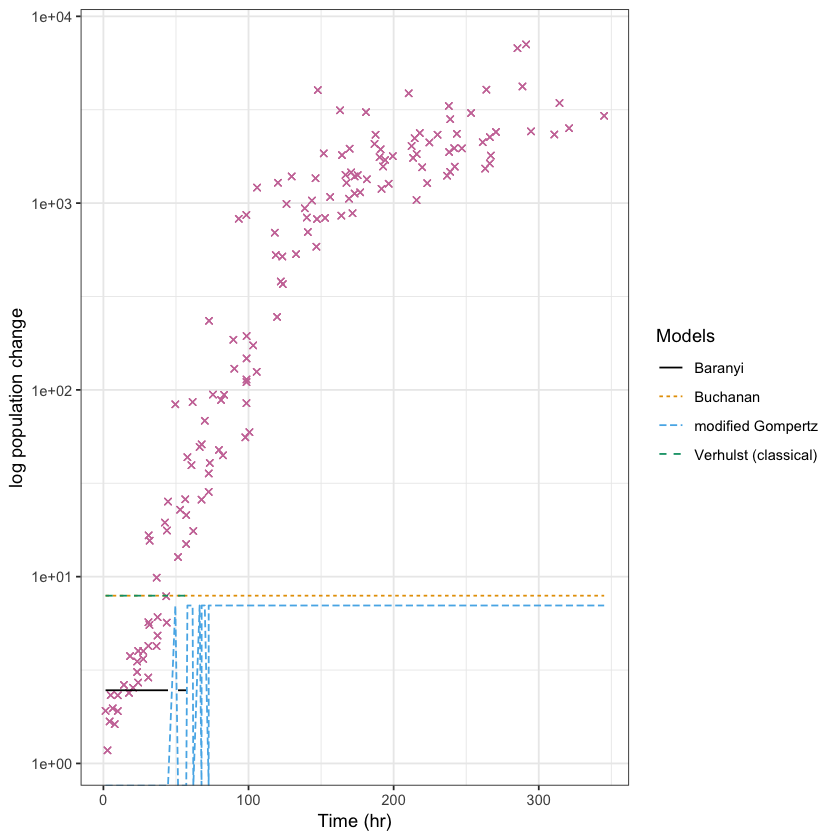

In [16]:
## slope details
v.N0<-median(a.1[which(a.1[,6]<30),7])
v.KK<-median(a.1[which(a.1[,6]>=(max(a.1[,6])-50)),7])
a.2<-a.1[which(a.1$Time.hr>=30 & a.1$Time.hr<(max(a.1[,6])-50)),]
v.rm<-(max(a.2[,7])-min(a.2[,7]))/(max(a.2[,6])-min(a.2[,6]))
v.rb<-max(a.2[,7])-v.rm*max(a.2[,6])
v.rx<--v.rb/v.rm
rm(a.2)

## plot data
a.2<-data.frame(a.1,c(rep("Verhulst (classical)",dim(a.1)[1]),
                      rep("modified Gompertz",dim(a.1)[1]),
                      rep("Baranyi",dim(a.1)[1]),
                      rep("Buchanan",dim(a.1)[1])),
               c(log(func_log0(N0=v.N0, K=v.KK, r=v.rm, t=a.1[,7])),
                func_gom(N0=v.N0, K=v.KK, r=v.rm, t=a.1[,7], ld=v.rx),
                func_bar(N0=v.N0, K=v.KK, r=v.rm, t=a.1[,7], tlag=30),
                log(func_buc(N0=v.N0, K=v.KK, r=v.rm, t=a.1[,7], tlag=30, cst=3))))
colnames(a.2)=c(colnames(a.1),"Models","Values")

## plot
ggplot(data=a.2, aes(x=a.2[,6]))+theme_bw()+
xlab("Time (hr)")+ylab("log population change")+
geom_point(aes(y=a.2[,7]), shape=4, colour=cbbPalette[8])+
geom_line(aes(y=a.2$Values, linetype=a.2$Models, colour=a.2$Models))+
scale_linetype_discrete(name="Models")+
scale_colour_manual(name="Models", values=cbbPalette)+
scale_y_continuous(labels = scientific,
                    trans = "log10",
                    oob = rescale_none) ## <https://stackoverflow.com/questions/10365167/geom-bar-bars-not-displaying-when-specifying-ylim>